# Sentiment analysis | Depp vs Heard

## Data extraction

Twitter extraction by keywords

### Imports

In [18]:
import tweepy as tw
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gonzalozabala/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Twitter authentificathion

In [19]:
ACCESS_KEY = "1528407397403959296-SiXEMki1ykYG1qg3WPht56Dh1nxvfm"
ACCESS_SECRET = "6BBykwX8DUyDKYpQ46pT7RfPMBM3E7muynpOpYSjgqPwo"
CONSUMER_KEY= 'fVDe8jYU1oWQKkOZlVHd17DDR'
CONSUMER_SECRET= '3EPEAxlpGl48QYl2iNBk6HlbrjONLWQ5qoDY61uVReLeHgbX6V'
BEARER = "AAAAAAAAAAAAAAAAAAAAADTKdAEAAAAAEygerXyhYaLCb0wzIuc7wsOak7w%3DJ6QKl3DzawKIUGdQaArG8yovhy8LpUr0MTgovJQ01naJ5b2BRZ"

In [20]:
client = tw.Client(bearer_token=BEARER)

### Tweets extraction

In [21]:
# Get tweets that contain the hashtag #xxxxxx
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english
tag = 'humpty'
query = '#'+ tag +' -is:retweet lang:en'
tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at'], max_results=100)

In [22]:
depp_tweets = pd.DataFrame(tweets.data)
depp_tweets

,created_at,id,text
0,2022-05-31 18:38:41+00:00,1531706748779651072,@DefectedRecords @richardvission he’s the reas...
1,2022-05-30 18:09:02+00:00,1531336899389964288,#Humpty The #Fraud by #LTCartoons #Hilarious ...
2,2022-05-30 15:49:02+00:00,1531301666154242051,#Humpty The #Fraud by #LTCartoons #Hilarious ...
3,2022-05-28 21:51:01+00:00,1530667990349500416,#Humpty The #Fraud by #LTCartoons #Hilarious ...
4,2022-05-26 00:27:01+00:00,1529620085387698179,#Humpty The #Fraud by #LTCartoons #Hilarious ...


### Data pre-processing

Remove tags, links, rt, break lines, and puntuactions

https://towardsdatascience.com/selenium-tweepy-to-scrap-tweets-from-tweeter-and-analysing-sentiments-1804db3478ac

In [23]:
tags = "\B@\w+"
rt = 'RT'
links = "\S*https?:\S*"
break_line = "\n"
puntuaction = '[^\w\s]'

patterns_to_delete = [tags, rt, links, break_line, puntuaction]
patterns_to_delete

['\\B@\\w+', 'RT', '\\S*https?:\\S*', '\n', '[^\\w\\s]']

In [24]:
for pattern in patterns_to_delete:
    depp_tweets['text'] = depp_tweets['text'].str.replace(pattern, '', regex=True)

depp_tweets

,created_at,id,text
0,2022-05-31 18:38:41+00:00,1531706748779651072,hes the reason I got into djing humpty
1,2022-05-30 18:09:02+00:00,1531336899389964288,Humpty The Fraud by LTCartoons Hilarious humo...
2,2022-05-30 15:49:02+00:00,1531301666154242051,Humpty The Fraud by LTCartoons Hilarious humo...
3,2022-05-28 21:51:01+00:00,1530667990349500416,Humpty The Fraud by LTCartoons Hilarious humo...
4,2022-05-26 00:27:01+00:00,1529620085387698179,Humpty The Fraud by LTCartoons Hilarious humo...


Removing stop words

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

depp_tweets['text'] = depp_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
depp_tweets

,created_at,id,text
0,2022-05-31 18:38:41+00:00,1531706748779651072,hes reason I got djing humpty
1,2022-05-30 18:09:02+00:00,1531336899389964288,Humpty The Fraud LTCartoons Hilarious humor ca...
2,2022-05-30 15:49:02+00:00,1531301666154242051,Humpty The Fraud LTCartoons Hilarious humor ca...
3,2022-05-28 21:51:01+00:00,1530667990349500416,Humpty The Fraud LTCartoons Hilarious humor ca...
4,2022-05-26 00:27:01+00:00,1529620085387698179,Humpty The Fraud LTCartoons Hilarious humor ca...


Tokenization and lemmatization:

In [26]:
from nltk.stem import WordNetLemmatizer
# Tokenization
tokenized_tweet = depp_tweets['text'].apply(lambda x: x.split())
# Finding Lemma for each word
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
#joining words into sentences (from where they came from)
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

depp_tweets['text'] = tokenized_tweet
depp_tweets

,created_at,id,text
0,2022-05-31 18:38:41+00:00,1531706748779651072,he reason I got djing humpty
1,2022-05-30 18:09:02+00:00,1531336899389964288,Humpty The Fraud LTCartoons Hilarious humor ca...
2,2022-05-30 15:49:02+00:00,1531301666154242051,Humpty The Fraud LTCartoons Hilarious humor ca...
3,2022-05-28 21:51:01+00:00,1530667990349500416,Humpty The Fraud LTCartoons Hilarious humor ca...
4,2022-05-26 00:27:01+00:00,1529620085387698179,Humpty The Fraud LTCartoons Hilarious humor ca...


### Visualization

Wordcloud

In [27]:
text = " ".join(review for review in depp_tweets.text.astype(str))

In [28]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

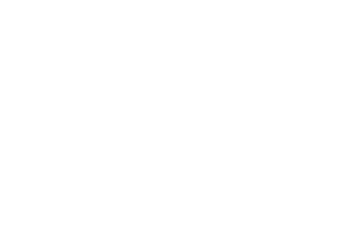

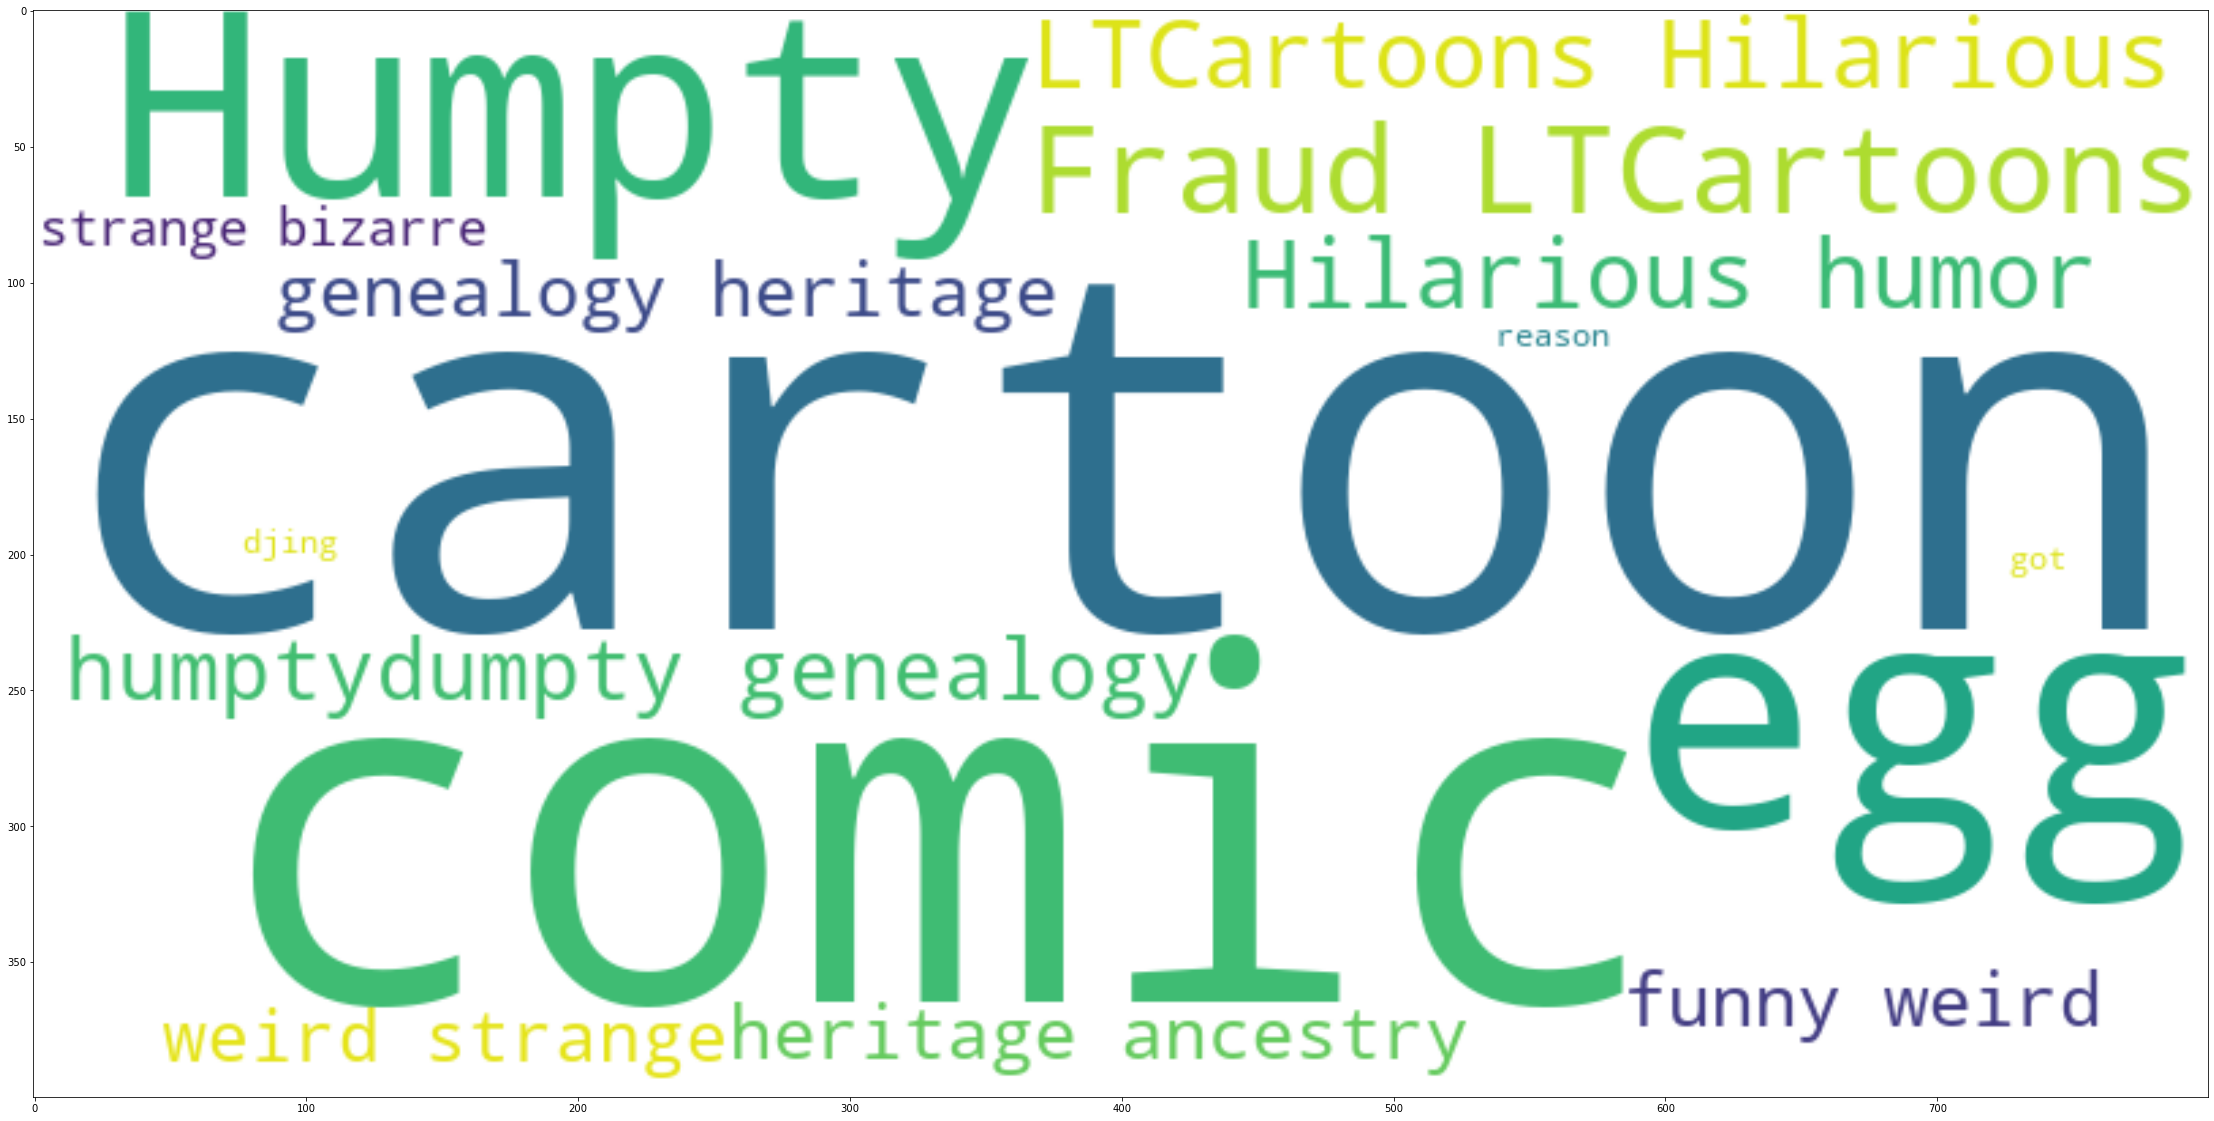

In [29]:
plt.axis("off")

plt.figure( figsize=(40,20))

plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation='bilinear')

### Model

In [30]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    if polarity_scores['neg'] > polarity_scores['pos']:
        return 'negative'
    else:
        return 'positive'

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity >= 0:
        return 'positive'
    else: 
        return 'negative'

In [31]:
sentiments_nltk = []
for index, row in depp_tweets.iterrows():
    sentiments_nltk.append(fetch_sentiment_using_SIA(row['text'][0]))
sentiments_nltk

['positive', 'positive', 'positive', 'positive', 'positive']

In [32]:
sentiments_nltk = []
for index, row in depp_tweets.iterrows():
    sentiments_nltk.append(fetch_sentiment_using_textblob(row['text'][0]))
sentiments_nltk

['positive', 'positive', 'positive', 'positive', 'positive']